In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from os.path import join as pjoin
from matplotlib import pyplot as plt
import random
import warnings
import keras
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,Conv1D,GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D,AveragePooling1D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import average 
from keras.models import Input, Model
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [3]:
# Video_label=pd.read_excel('new23label.xlsx')
# group=Video_label.groupby('label')
# M=group.mean()
# M.to_csv('new23label.csv')
# random.uniform(-0.3, 0.3)

In [4]:
# first we can see what does the feature look like
def get_raw_feature():
    video_data_dir='new23feature'
    X=[]
    Y=[]
    for video in os.listdir(video_data_dir):
        each_video= pjoin(video_data_dir,video)
        ## 'C:\\videofeature\\' using
#         l=each_video.split('t_')[1]

        # 'C:\\new_video_feature\\' using
        l=each_video.split('e_')[1]
        l=l.split('.')[0]
        LABEL=int(l)
        X.append(np.load(each_video))
        Y.append(LABEL)
#     Video_label=pd.read_csv('label.csv')
# #     Video_label=np.array(Video_label)[:,:-1]
    return X,Y


## 1 Read features from 19 npy files

In [5]:
X,Y=get_raw_feature()
Video_label=pd.read_csv('newall_label.csv')
# Video_label=np.array(Video_label)[:,:-1]
print('there are ',len(X),'videos')
print('feature of video [0]',X[0].shape)
print('video [0] is from video' ,Y[0])
print(Y)

there are  23 videos
feature of video [0] (153, 14)
video [0] is from video 11
[11, 113, 130, 143, 152, 164, 16, 171, 192, 176, 207, 194, 236, 237, 240, 253, 258, 257, 49, 59, 74, 78, 91]


In [6]:
Video_label

,GEARS - Depth Perception,GEARS - Bimanual Dexterity,GEARS - Efficiency,GEARS - Force Sensitivity,GEARS - Autonomy,GEARS - Robotic Control,label
0,2.000000,1.666667,2.000000,1.333333,2.666667,2.333333,11
1,1.333333,1.000000,1.000000,1.000000,1.000000,1.333333,16
2,3.000000,3.000000,2.000000,2.333333,2.666667,2.666667,49
3,2.333333,1.666667,1.666667,2.000000,1.666667,1.666667,59
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,74
5,2.500000,3.000000,2.000000,2.000000,2.500000,2.000000,78
6,4.000000,4.000000,4.000000,4.500000,4.500000,5.000000,91
7,2.500000,3.000000,2.500000,2.500000,3.000000,2.500000,113
8,3.000000,3.000000,2.500000,2.500000,3.000000,3.000000,130
9,3.000000,2.500000,2.500000,2.000000,2.500000,2.500000,143


Video_label contains detail labels and we can use Y to index them later.

In [7]:
def getlabel(number):
    L=Video_label[Video_label['label']==number]
    L=np.array(L)[:,:-1]
    L= np.squeeze(L)
    return L
# def getlabel_addnoise(number):
#     L=Video_label[Video_label['label']==number]
#     L=np.array(L)[:,:-1]
#     L= np.squeeze(L)
#     noise=np.array([random.uniform(-0.4, 0.4) for _ in range(len(L))])
# #     print(noise)
#     return L+noise

In [8]:
# noise=getlabel_addnoise(16)
# print(noise)

Here we create two functions to sample video clips from each video and get their time differences.


In [9]:
def get_diff_and_hstack_to_orginal_data(X,time_lag=2,move_threshold=200):
    original=X[:-time_lag]
    modified=X[time_lag:]
    result=modified-original
    ## threshold
    # consider there was no top in the first image and it showed up in the next image
    # the difference would be huge, which was not ideal.
    # so we need to filter these extrem value 
    result[np.abs(result)>move_threshold]=0
    
    return np.hstack((X[time_lag:],result))

##from each video sample video clips with size=window_L. you can specify stride 
def make_video_clips(matrix,window_L,stride):
    alldata=[]

    total_frame=matrix.shape[0]
    index=[n for n in range(1,total_frame,stride)]
    for start_index in index:
        if start_index+window_L> total_frame:
            break
#         print(start_index)
        each_clip_data=matrix[start_index:start_index+window_L]
#         each_clip_data=np.transpose(each_clip_data)
#         print(each_clip_data.shape)
        alldata.append(each_clip_data)
    return np.array(alldata)

## 2 pre-processing the feature
make new 28-d feature and  sample video clips

In [10]:
####################################### set video clips parameters
############################################### make new 28-d feature
video_clips_length=30
time_lag=2
move_threshold=150
stride=video_clips_length

####################################### set video clips parameters
############################################### make new 28-d feature
all_data=[]
for each_video,label in zip(X,Y):

    re=get_diff_and_hstack_to_orginal_data(each_video,time_lag,move_threshold)
#     re=each_video
    video_clip=make_video_clips(re,video_clips_length,stride)
    print(video_clip.shape)
    all_data.append((video_clip))


(5, 30, 28)
(4, 30, 28)
(10, 30, 28)
(20, 30, 28)
(10, 30, 28)
(40, 30, 28)
(100, 30, 28)
(19, 30, 28)
(5, 30, 28)
(100, 30, 28)
(10, 30, 28)
(100, 30, 28)
(10, 30, 28)
(5, 30, 28)
(20, 30, 28)
(40, 30, 28)
(9, 30, 28)
(99, 30, 28)
(20, 30, 28)
(40, 30, 28)
(20, 30, 28)
(10, 30, 28)
(10, 30, 28)


In [11]:
c=all_data[0]

In [12]:
c[0][2]

array([ 49, 183,   0,   0, 140, 160, 327,  72, 202, 162, 279,  77, 266,
       128, -35,   0,   0,   0, -29,  -1,   0,  72, -41,  -8,   1,   1,
        -2,   1], dtype=int32)

So there are 19 videos and you can see how many video clips they have.

And next we will use leave one method to train the model.

## 3 prepare leave one data and give every video clips their label

In [13]:
# this function is used to stack 18 videos into a big matrix
# the dimenstion will be 
# (n1+n2..+n18,28,30)
# and the label will be (n1+n2..+n18,6)

def stack_video_clips_get_label(data,label):
    final_data=data[0]

    final_label=[getlabel(label[0]) for _ in range(final_data.shape[0])]
#     print(len(final_label))
#     print(final_data.shape)
    for i in range(1,len(data)):
        final_data=np.vstack((final_data,data[i]))
        for j in range(data[i].shape[0]):
            final_label.append(getlabel(label[i]))
    return final_data,np.array(final_label)

########## leave one and stack all video clips
def hold_out(X,Y,hold_number):
        new_label=Y.copy()
        new_data=X.copy()
        # find video n 's index
        index=new_label.index(hold_number)
        # get the video n and it's label
        X_test=new_data[index]
        test_label=getlabel(hold_number)
        y_test=np.array([test_label for _ in range(X_test.shape[0])])
#         # so we can del them 
        del new_label[index]
        del new_data[index]
#         print(new_label)
        final_data_X,final_data_Y=stack_video_clips_get_label(new_data,new_label)

        return final_data_X,X_test,final_data_Y,y_test


In [14]:
# for each col, calculate the weighted average
def get_weighted_average(df):
    length=len(df)
    top=int(1/6*length)
    bottom=length-top
    df=np.array(df)
    df=np.sort(df)
    weghted_sum=np.sum(df[:top]*(1/6))+np.sum(df[top+1:bottom]*(2/3))+np.sum(df[bottom+1:]*(1/6))
    weghted_sum=weghted_sum/length
    return weghted_sum

# make the data frame
# Plot_data is the pridect result, which will have 6 scores
def get_video_score(Plot_data,GT):
    weight_ave_re=[]
    mean_re=[]
    median_re=[]
    pooled_re=[]
    
    for i in Plot_data.columns:
        weight_ave=get_weighted_average(Plot_data[i])
        weight_ave_re.append(weight_ave)
        
        mean_value=np.mean(Plot_data[i])   
        mean_re.append(mean_value)
        
        median_value = np.median(Plot_data[i])
        median_re.append(median_value)
        
        # pooling is also a weighted average 
        pooling = (weight_ave*0.2 + mean_value*0.2 + median_value*0.6)
        
        pooled_re.append(pooling)
        
    video_result=pd.DataFrame([weight_ave_re,mean_re,median_re,pooled_re,GT])
    video_result.columns = ['DP','BD','E','FS','A','RC']
    video_result.index = ['Weighted_average', 'Mean', 'Median','Cool_pooling','Ground_truth']
    return video_result
    


## 3 perform leave one cross validation  


In [15]:
from keras.layers import average, concatenate,RepeatVector,Lambda,add,subtract
from keras.models import Input, Model
from keras import backend as K
from keras.layers.normalization import BatchNormalization

In [16]:
# the model we will use
def make_model_1d(l2_lambda,clip_lenth,dimension):

    input_holder = Input(shape=(clip_lenth, dimension))
    
    x = Conv1D(filters=8, 
                     kernel_size=15, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                     kernel_regularizer=l2(l2_lambda)
              )(input_holder)

    x = Conv1D(filters=8, 
                     kernel_size=10, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                    kernel_regularizer=l2(l2_lambda)
              )(x)
#     x = Conv1D(filters=8, 
#                      kernel_size=5, 
#                      padding='same',
#                      activation='relu', 
#                      input_shape=(clip_lenth, dimension),
#                      kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x= MaxPooling1D(2,padding='same')(x)
    
    x = Conv1D(filters=16, 
                     kernel_size=5, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                    kernel_regularizer=l2(l2_lambda)
              )(x)

    x = Conv1D(filters=16, 
                     kernel_size=5, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                     kernel_regularizer=l2(l2_lambda)
              )(x)
    x = BatchNormalization()(x)
#     x = Conv1D(filters=16, 
#                      kernel_size=5, 
#                      padding='same',
#                      activation='relu', 
#                      input_shape=(clip_lenth, dimension),
#                      kernel_regularizer=l2(l2_lambda))(x)

#     x = GlobalMaxPooling1D()(x)
#     x = Flatten()(x)

#####_______________________________________________________________________
    u = GlobalMaxPooling1D()(x)
    u_broadcast=RepeatVector(x.shape[1])(u)
    
    def op(inputs):
        x, y = inputs
        return K.pow((x - y), 2) 

    Z=Lambda(op)([u_broadcast,x])

    v = GlobalMaxPooling1D()(Z)
    x = concatenate([u,v])
    
##    v=GlobalMaxPooling1D()((x-u))

#####_______________________________________________________________________
#     x = Dense(16, 
#               activation='relu',
#               kernel_initializer='he_uniform',
#               kernel_regularizer=l2(l2_lambda)
#             )(x)

#     x = Dropout(0.5)(x) # add some dropout for regularization after conv layers
    
#     x = Dense(6, 
#               activation='sigmoid', 
#               kernel_initializer='glorot_uniform',
#               kernel_regularizer=l2(l2_lambda)
#              )(x)
    
#####_______________________________________________________________________  
#     x = Dense(16,activation='relu',
#               kernel_regularizer=l2(l2_lambda)
#              )(x)
#     x = Dropout(0.5)(x) # add some dropout for regularization after conv layers


#     x = Dense(32,activation='relu',kernel_initializer='he_uniform',
#               kernel_regularizer=l2(l2_lambda)
#              )(x)
#     x = Dropout(0.5)(x) # add some dropout for regularization after conv layers

#####______________________________Multi task_________________________________________  
# ['DP','BD','E','FS','A','RC']
    number_of_N=16
    DP=0.5
    y1 = Dense(number_of_N,activation='relu',kernel_initializer='he_uniform',
             kernel_regularizer=l2(l2_lambda)
             )(x)
    y1 = Dropout(DP)(y1) # add some dropout for regularization after conv layers
    y1= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform',name='DP'
#              kernel_regularizer=l2(l2_lambda)
             )(y1)

    y2 = Dense(number_of_N,activation='relu',kernel_initializer='he_uniform',
             kernel_regularizer=l2(l2_lambda)
             )(x)
    y2 = Dropout(DP)(y2) # add some dropout for regularization after conv layers
    y2= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform',name='BD'
#              kernel_regularizer=l2(l2_lambda)
             )(y2)
    
    y3 = Dense(number_of_N,activation='relu',kernel_initializer='he_uniform',
             kernel_regularizer=l2(l2_lambda)
             )(x)
    y3 = Dropout(DP)(y3) # add some dropout for regularization after conv layers
    y3= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform',name='E'
#              kernel_regularizer=l2(l2_lambda)
             )(y3)

    y4 = Dense(number_of_N,activation='relu',kernel_initializer='he_uniform',
             kernel_regularizer=l2(l2_lambda)
             )(x)
    y4 = Dropout(DP)(y4) # add some dropout for regularization after conv layers
    y4= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform',name='FS'
#              kernel_regularizer=l2(l2_lambda)
             )(y4)
    
    y5 = Dense(number_of_N,activation='relu',kernel_initializer='he_uniform',
             kernel_regularizer=l2(l2_lambda)
             )(x)
    y5 = Dropout(DP)(y5) # add some dropout for regularization after conv layers
    y5= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform',name='A'
#              kernel_regularizer=l2(l2_lambda)
             )(y5)
    
    y6 = Dense(number_of_N,activation='relu',kernel_initializer='he_uniform',
             kernel_regularizer=l2(l2_lambda)
             )(x)
    y6 = Dropout(DP)(y6) # add some dropout for regularization after conv layers    
    y6= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform',name='RC'
#              kernel_regularizer=l2(l2_lambda)
             )(y6)
#####______________________________Multi task_________________________________________  


#     x = Dense(6, activation='sigmoid',kernel_initializer='glorot_uniform',
#              kernel_regularizer=l2(l2_lambda))(x)

#####_______________________________________________________________________

    # none-multi task
#     model = Model(inputs=input_holder,outputs=x)
    
    # multi task   

    model = Model(inputs=input_holder,outputs=[y1,y2,y3,y4,y5,y6])
# ['DP','BD','E','FS','A','RC']
    losses = {
        "DP": "mean_squared_error",
        "BD": "mean_squared_error",
        "E": "mean_squared_error",
        "FS": "mean_squared_error",
        "A": "mean_squared_error",
        "RC": "mean_squared_error",
    }
    
    model.compile(#loss='mean_squared_error', # 'categorical_crossentropy' 'mean_squared_error' 'mean_absolute_percentage_error'
                  loss=losses, 
              optimizer='adam') # 'adadelta' 'rmsprop'
                     
#     model.summary()
    return model
te=make_model_1d(0.001,30,28)

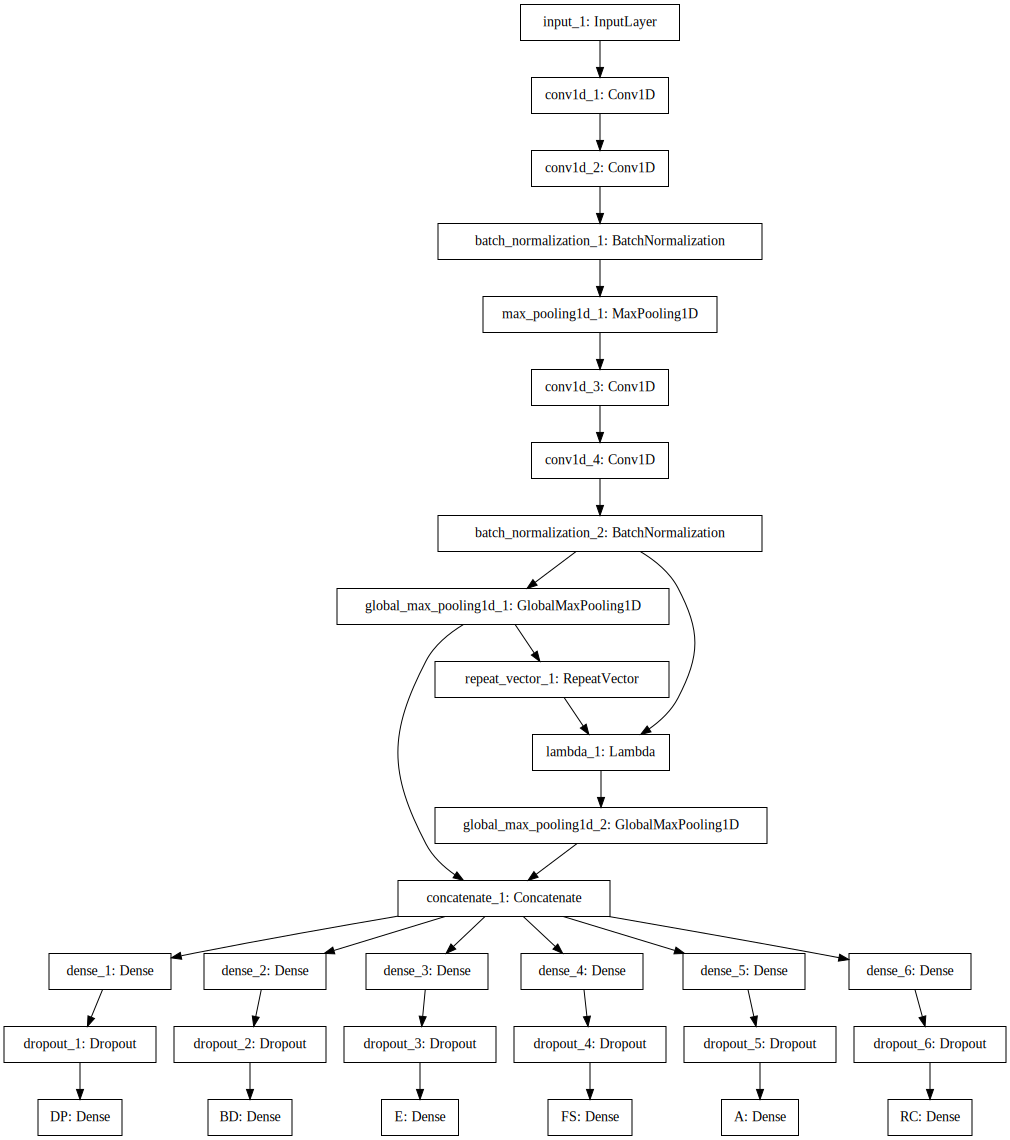

In [17]:
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(te).create(prog='dot', format='svg'))

In [18]:
plot_model(te, to_file='model1.png')

In [19]:
# customized data generator
def generator_noise(data, label, batch_size=64):
    while 1:
        DP = []  
        BD = []
        E = []
        FS = []
        A = []
        RC = []
        
        rows = np.random.randint(0, data.shape[0], size=batch_size)

        samples = data[rows]
        y=label[rows]
        noise=np.random.uniform(low=-0.1, high=0.1, size=(y.shape[0],y.shape[1]))
        y=y+noise
        for i in range(len(y)):
            DP.append(y[i][0])
            BD.append(y[i][1])
            E.append(y[i][2])
            FS.append(y[i][3])
            A.append(y[i][4])
            RC.append(y[i][5])
        labels = [np.array(DP),np.array(BD),np.array(E),np.array(FS), np.array(A),np.array(RC)]
        yield samples,labels
        
def generator(data, label, batch_size=64):
    while 1:
        DP = []  
        BD = []
        E = []
        FS = []
        A = []
        RC = []
        
        rows = np.random.randint(0, data.shape[0], size=batch_size)

        samples = data[rows]
        y=label[rows]
#         noise=np.random.uniform(low=-0.5, high=0.5, size=(y.shape[0],y.shape[1]))
#         y=y+noise
        for i in range(len(y)):
            DP.append(y[i][0])
            BD.append(y[i][1])
            E.append(y[i][2])
            FS.append(y[i][3])
            A.append(y[i][4])
            RC.append(y[i][5])
        labels = [np.array(DP),np.array(BD),np.array(E),np.array(FS), np.array(A),np.array(RC)]
        yield samples,labels

In [20]:
# X_train, X_test, y_train, y_test=hold_out(all_data,Y,11)

In [21]:
# batch_size=64
# train_gen=generator_noise(X_train, y_train, batch_size)
# val_gen=generator(X_test, y_test, batch_size)
# a,b=next(train_gen)
# b[0].shape

In [22]:
def test_hold_out(model_name,hold_out_number,E,show_result=False):
    # using leave one cv to get train/test data
    X_train, X_test, y_train, y_test=hold_out(all_data,Y,hold_out_number)
    
    # scale all the value to 0-1
    X_train=X_train/640-0.5
    X_test=X_test/640-0.5
    y_train=y_train/5
    y_test=y_test/5
#     y_train=y_train
#     y_test=y_test
    # print(X_train.shape,y_train.shape)
    # print(X_test.shape,y_test.shape)

    sample_of_trainningdata=X_train.shape[0]
    sample_of_testdata=X_test.shape[0]


    batch_size=64
    l2=0.01


    train_gen=generator_noise(X_train, y_train, batch_size)
    val_gen=generator(X_test, y_test, batch_size)
    
    #prepare for inout shape
    clip_lenth=X_train.shape[1]
    dimension=X_train.shape[2]
    
    #make cnn 1d
    if model_name=='ENS':
        model=make_model_ens(l2,clip_lenth,dimension)
        
    if model_name=='LSTM':
        model=make_lstm()
    if model_name=='CNN':    
        model=make_model_1d(l2,clip_lenth,dimension)
        
    model_h=model.fit_generator(train_gen,
                        steps_per_epoch=sample_of_trainningdata//batch_size,
                        epochs=E,
                        validation_data=val_gen,
                       validation_steps=sample_of_testdata//batch_size +1 ,
                        verbose=0 )
#     model_h=model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test),
#        verbose=0  )
    
    
    if show_result:
        ax=plt.figure(figsize=(12,8))
        ax = plt.subplot(221)
        ax.plot(model_h.history['loss'])
        plt.ylabel('Training Loss')
        plt.xlabel('epochs')

        ax = plt.subplot(222)
        ax.plot(model_h.history['val_loss'])
        plt.ylabel('valadation Loss')
        plt.xlabel('epochs')

        print('loss',model_h.history['val_loss'][-1])

        GT=list(getlabel(hold_out_number))

        #get pridect result
        predict=model.predict(X_test)
        data={}
        task=['DP','BD','E','FS','A','RC']
        
        print(X_test.shape)
        print(len(predict))
        for i in range(len(predict)):
            data[task[i]]=np.squeeze(predict[i])
#         print(data)
#         re=predict[0]
#         print(re.shape)
#         for i in range(len(predict)):
#             print(re)
#             print()
#             re=np.hstack((re,predict[i]))
#         print(re[0][6])
#         print(re.shape)
#         print(np.squeeze(predict[0]))
#         re=predict
#         re=predict
#         print(re.shape)
#         Plot_data=pd.DataFrame(predict,columns=['DP','BD','E','FS','A','RC'])
        Plot_data=pd.DataFrame(data)
        Plot_data=Plot_data*5
    
#         print(Plot_data)
#         print(Plot_data.shape)
        video_result=get_video_score(Plot_data,GT)
        
        ax = plt.subplot(224)
        ax.plot(Plot_data)
#         ax.legend()
#         ax.plot(Plot_data.BD)
        plt.ylabel('Gear Score')
        plt.xlabel('Video clips length')
#         print(video_result)

        y=[x for x in range(1,7)]
        ax = plt.subplot(223)
        gt=video_result.iloc[4]
        re=video_result.iloc[3]
        ax.plot(y, re, label='predict')
        ax.plot(y, gt, label='ground truth')
        plt.ylim(0,5.5)
        ax.legend()
        plt.show()
    return model_h.history['val_loss'][-1]


In [23]:
# print(Y)
# model_name='CNN'
# print("you can try the video number above")
# test_hold_out(model_name,11,10,show_result=True)

video 11
loss 1.7212873697280884
(5, 30, 28)
6


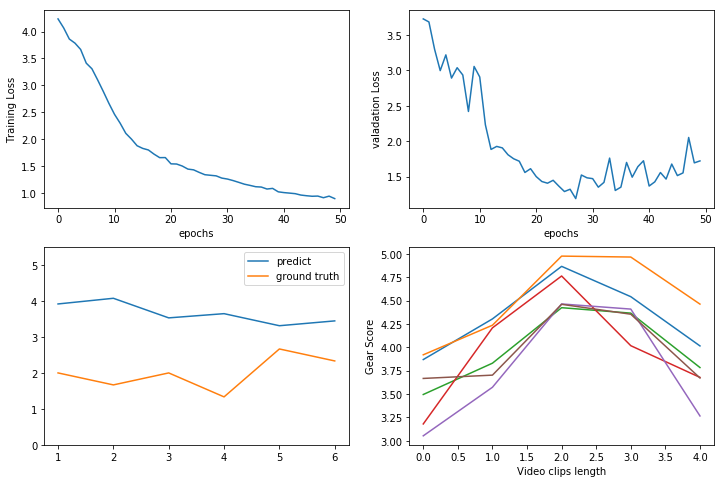

video 113
loss 0.5490896701812744
(4, 30, 28)
6


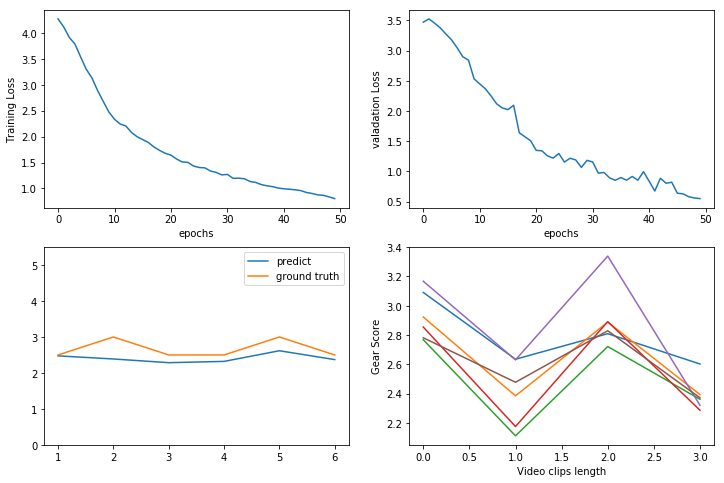

video 130
loss 0.8168808221817017
(10, 30, 28)
6


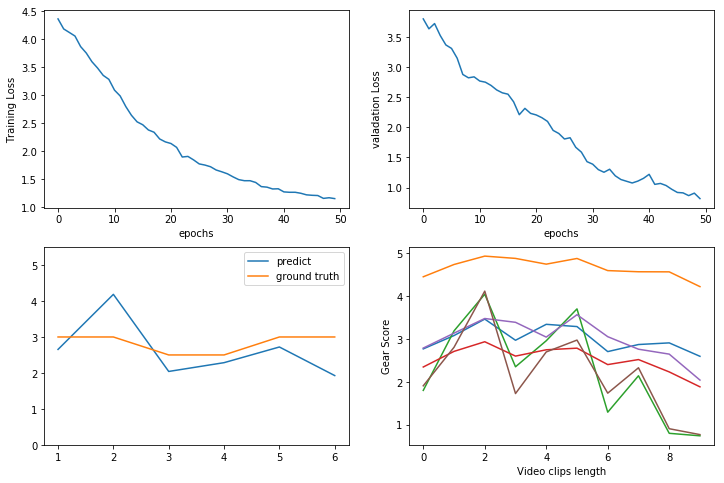

video 143
loss 0.5937030911445618
(20, 30, 28)
6


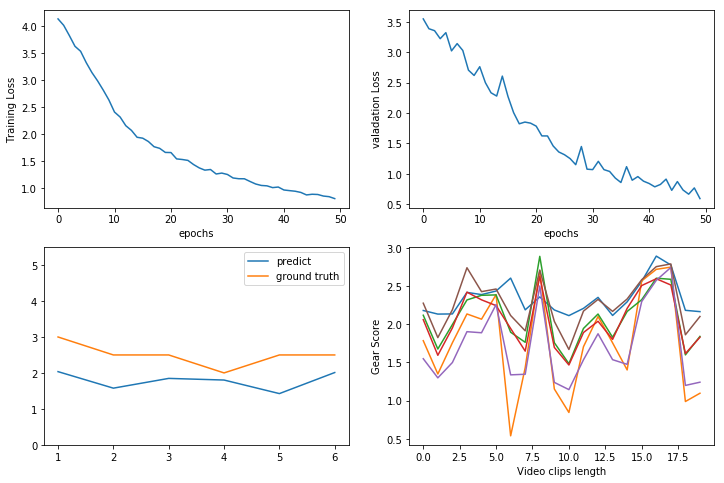

video 152
loss 1.28594970703125
(10, 30, 28)
6


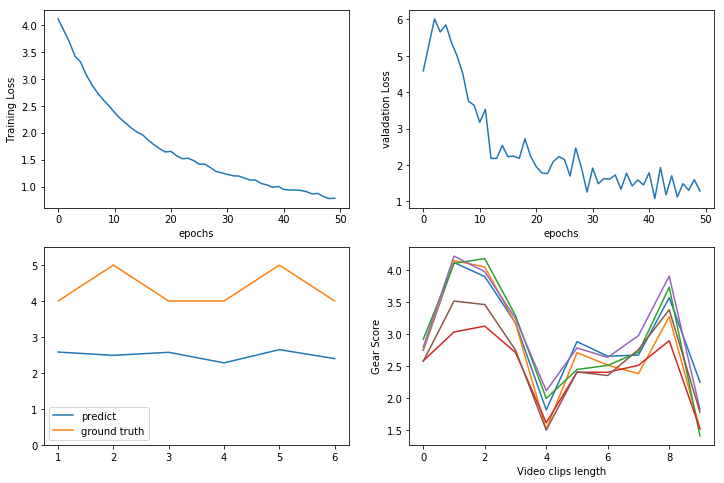

video 164
loss 2.870439291000366
(40, 30, 28)
6


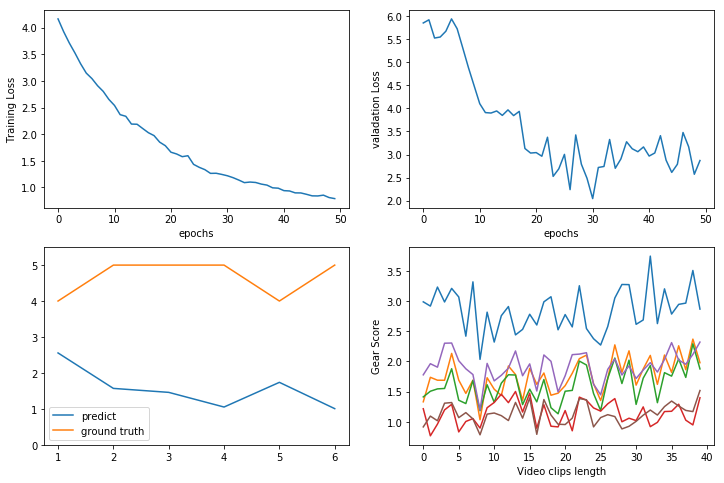

video 16
loss 1.418923020362854
(100, 30, 28)
6


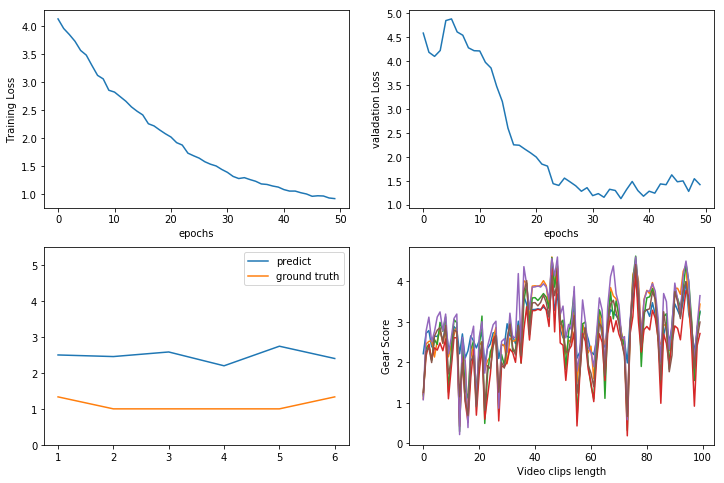

video 171
loss 1.024107813835144
(19, 30, 28)
6


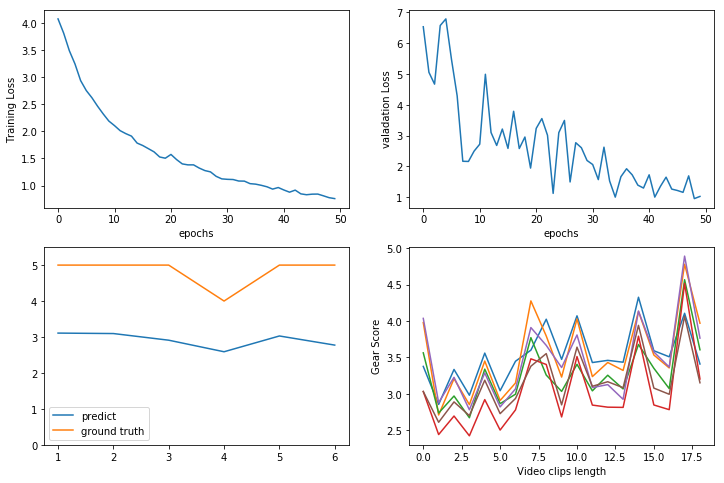

video 192
loss 1.2621148824691772
(5, 30, 28)
6


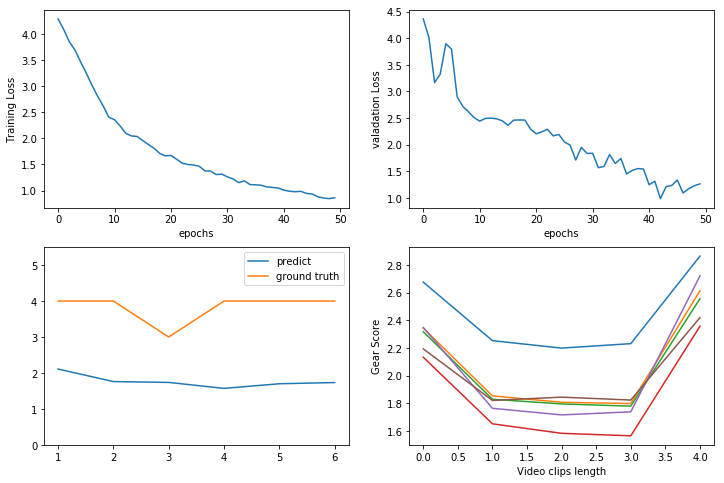

video 176
loss 0.8708805441856384
(100, 30, 28)
6


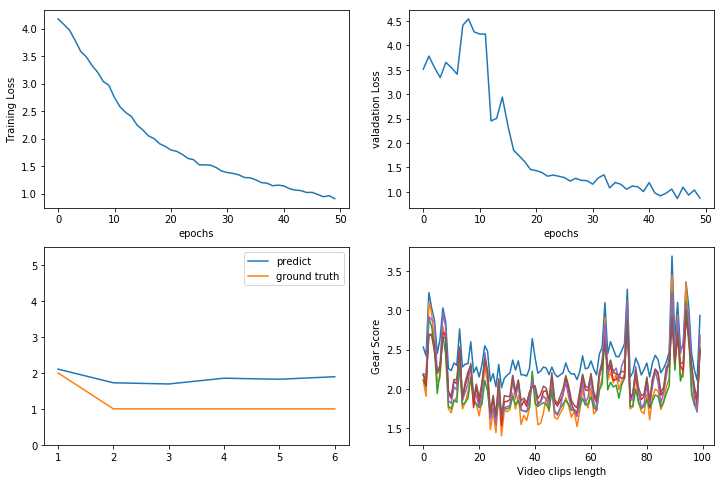

video 207
loss 0.8677873015403748
(10, 30, 28)
6


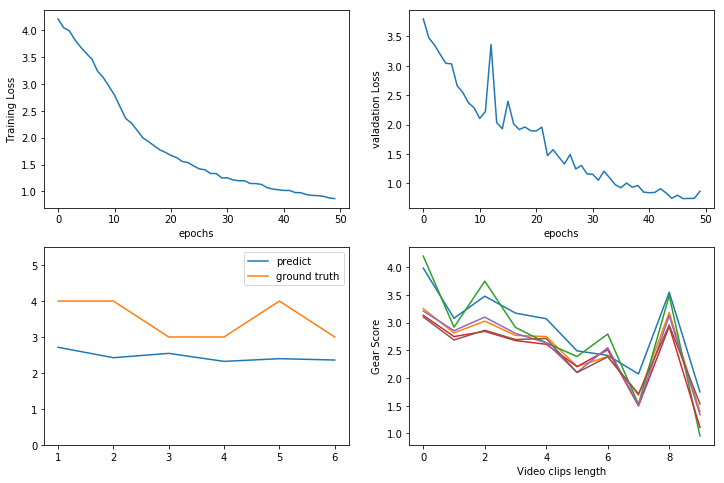

video 194
loss 1.2994801998138428
(100, 30, 28)
6


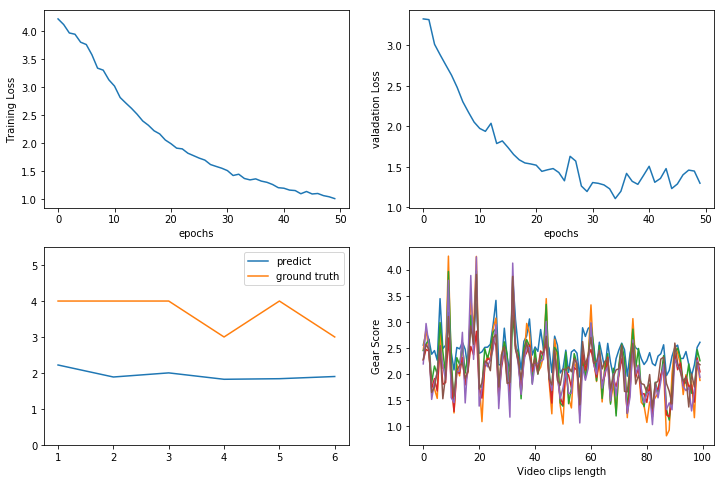

video 236
loss 0.8274421691894531
(10, 30, 28)
6


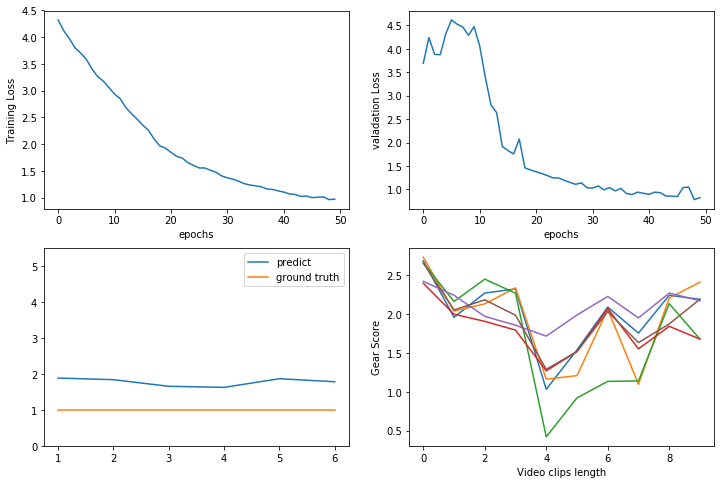

video 237
loss 0.6995062232017517
(5, 30, 28)
6


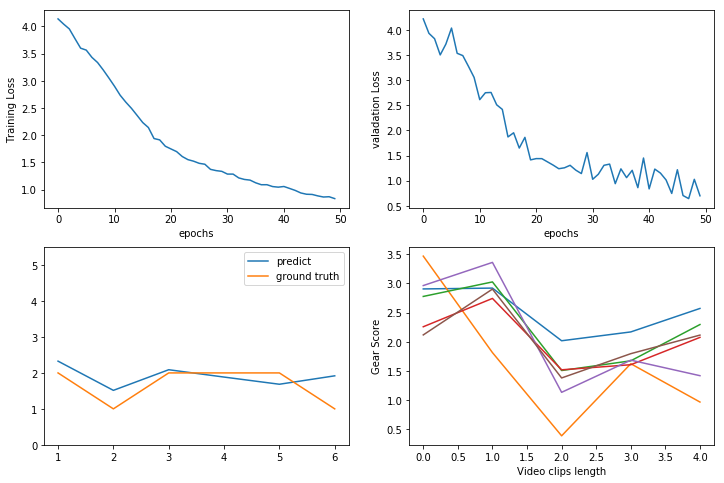

video 240
loss 2.723726272583008
(20, 30, 28)
6


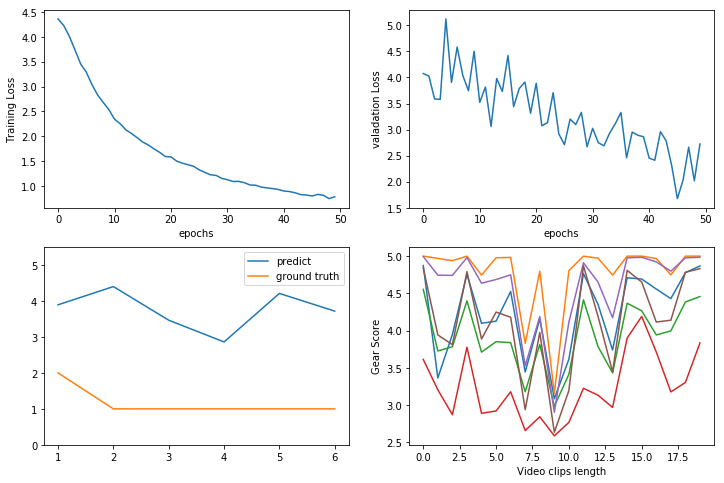

video 253
loss 0.6586408019065857
(40, 30, 28)
6


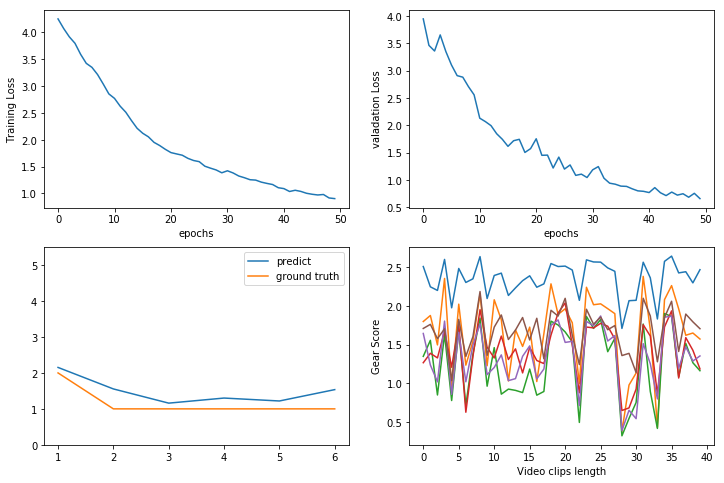

video 258
loss 0.6534526348114014
(9, 30, 28)
6


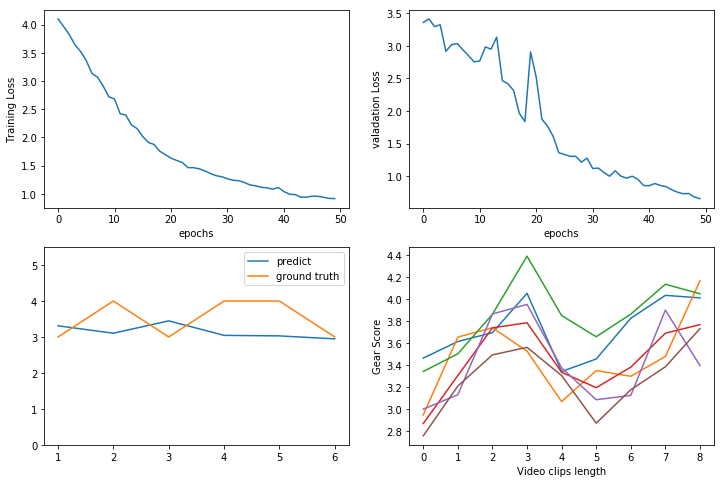

video 257
loss 1.297755241394043
(99, 30, 28)
6


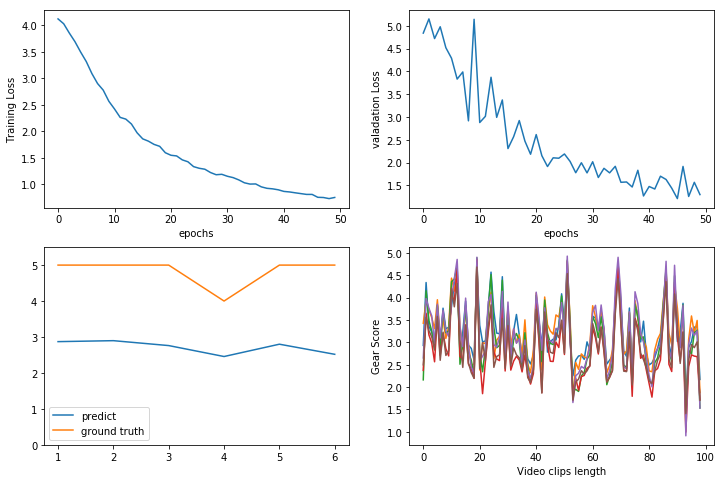

video 49
loss 0.7481447458267212
(20, 30, 28)
6


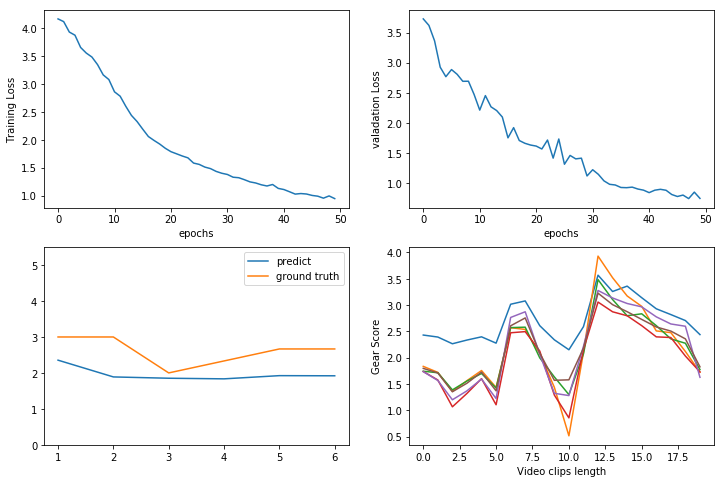

video 59
loss 0.9316383600234985
(40, 30, 28)
6


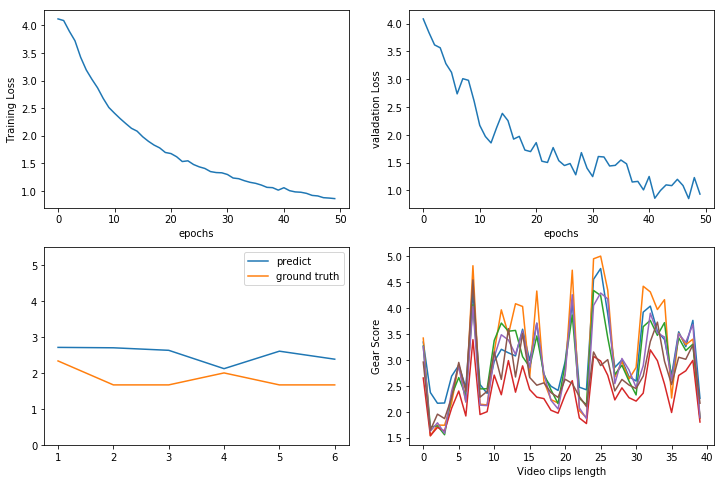

video 74
loss 0.7032284140586853
(20, 30, 28)
6


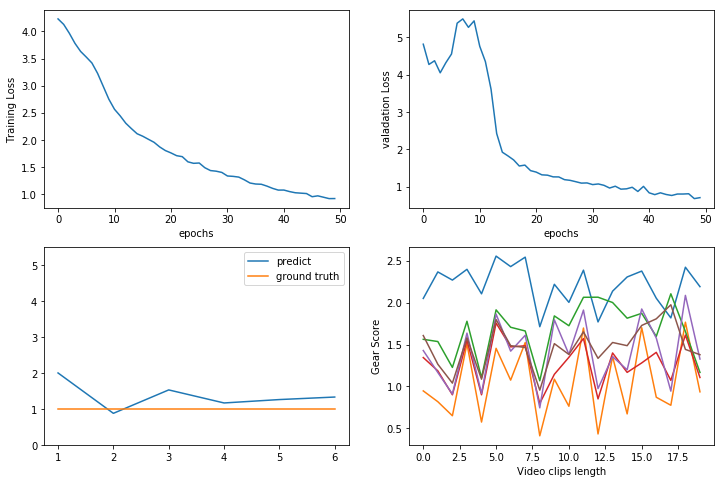

video 78
loss 1.2363957166671753
(10, 30, 28)
6


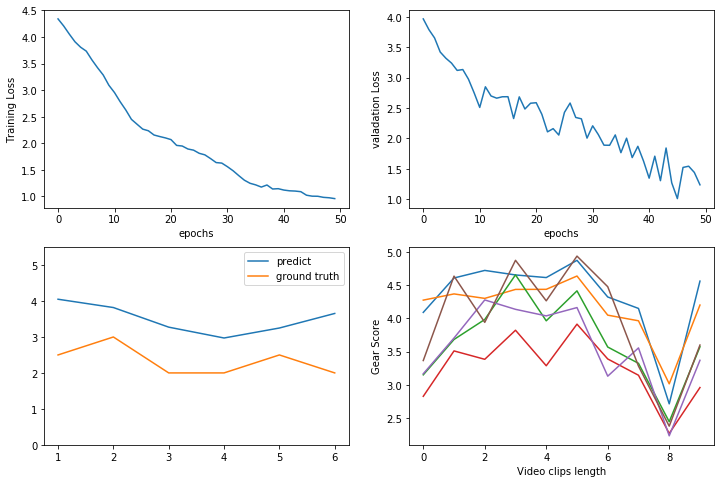

video 91
loss 1.7395168542861938
(10, 30, 28)
6


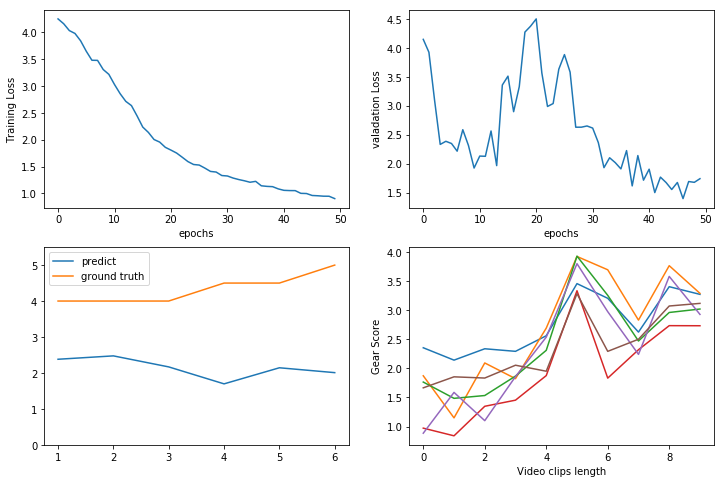

total_loss=  26.80009114742279


In [24]:
####un-comment the code blow to test all the video
total_loss=0
show_result=True
model_name='CNN'
for i in Y:
    print('video',i)
    loss=test_hold_out(model_name,i,50,show_result)
    total_loss=total_loss+loss
print('total_loss= ',total_loss)

In [25]:
# ####################################### set video clips parameters
# ############################################### make new 28-d feature
# video_clips_length=[30,60]
# time_lag=[1,2]
# move_threshold=[100,200]
# # stride=int(video_clips_length)

# ####################################### set video clips parameters
# ############################################### make new 28-d feature

# for vl in video_clips_length:
#     for tl in time_lag:
#         for mt in move_threshold:
#             S=[int(vl),int(vl/2)]
#             for stride in S:
#                 print('video_clips_length',vl,' time_lag',tl,'move_threshold',mt,'stride',stride)

#                 all_data=[]
                
#                 for each_video,label in zip(X,Y):

#                     re=get_diff_and_hstack_to_orginal_data(each_video,tl,mt)
#                     video_clip=make_video_clips(re,vl,stride)
#     #                 print(video_clip.shape)
#                     all_data.append((video_clip))
        
#                 total_loss=0
#                 show_result=True
#                 for i in Y:
#                     print('video',i)
#                     loss=test_hold_out(i,show_result)
#                     total_loss=total_loss+loss
#                 print('total_loss= ',total_loss)

In [26]:
# video_clips_length 30  time_lag 1 move_threshold 100 stride 30
# total_loss=  1.412462801206857
# video_clips_length 30  time_lag 1 move_threshold 100 stride 15
# total_loss=  1.4150967202149332
# video_clips_length 30  time_lag 1 move_threshold 200 stride 30
# total_loss=  1.397022263146937
# video_clips_length 30  time_lag 1 move_threshold 200 stride 15
# total_loss=  1.4331296226009727
# video_clips_length 30  time_lag 2 move_threshold 100 stride 30
# total_loss=  1.3969617546536028
# video_clips_length 30  time_lag 2 move_threshold 100 stride 15
# total_loss=  1.4400804012548178
# video_clips_length 30  time_lag 2 move_threshold 200 stride 30
# total_loss=  1.3962573492899537
# video_clips_length 30  time_lag 2 move_threshold 200 stride 15
# total_loss=  1.425527356332168

GlobalMaxPooling1D, Falttern, GlobalMaxPooling1D+var  these three method did not have significant difference.<br>
No regularizer + early stop is the current best method.<br>
Latge regularizer makes smooth and average curve and the predict line tends to be stright 